In [1]:
%pip install stop-words
%pip install razdel
%pip install wordcloud
%pip install wikipedia

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import razdel
import wikipedia
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from stop_words import get_stop_words
from PIL import Image
stoplist = get_stop_words('russian')
from pymorphy2 import MorphAnalyzer
import numpy as np
shape = np.array(Image.open('/ylt.jpg'))

In [3]:
wikipedia.set_lang("ru")
wiki = wikipedia.page('Якутия')
text = wiki.content

In [4]:
from razdel import sentenize, tokenize
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text_generator = sentenize(text)
print(next(text_generator))
print(next(text_generator))
list(tokenize(text))


Substring(0, 34, 'Респу́блика Саха́ (Яку́тия) (якут.')
Substring(35, 219, 'Саха Өрөспүүбүлүкэтэ, Саха Сирэ) — самый большой по площади субъект Российской Федерации, республика в её составе, а также самая большая административно-территориальная единица в мире.')


[Substring(0, 11, 'Респу́блика'),
 Substring(12, 17, 'Саха́'),
 Substring(18, 19, '('),
 Substring(19, 26, 'Яку́тия'),
 Substring(26, 27, ')'),
 Substring(28, 29, '('),
 Substring(29, 33, 'якут'),
 Substring(33, 34, '.'),
 Substring(35, 39, 'Саха'),
 Substring(40, 55, 'Өрөспүүбүлүкэтэ'),
 Substring(55, 56, ','),
 Substring(57, 61, 'Саха'),
 Substring(62, 66, 'Сирэ'),
 Substring(66, 67, ')'),
 Substring(68, 69, '—'),
 Substring(70, 75, 'самый'),
 Substring(76, 83, 'большой'),
 Substring(84, 86, 'по'),
 Substring(87, 94, 'площади'),
 Substring(95, 102, 'субъект'),
 Substring(103, 113, 'Российской'),
 Substring(114, 123, 'Федерации'),
 Substring(123, 124, ','),
 Substring(125, 135, 'республика'),
 Substring(136, 137, 'в'),
 Substring(138, 140, 'её'),
 Substring(141, 148, 'составе'),
 Substring(148, 149, ','),
 Substring(150, 151, 'а'),
 Substring(152, 157, 'также'),
 Substring(158, 163, 'самая'),
 Substring(164, 171, 'большая'),
 Substring(172, 203, 'административно-территориальная'),
 Su

In [5]:
morph = MorphAnalyzer()
morph.parse(next(tokenize(text)).text)

[Parse(word='респу́блика', tag=OpencorporaTag('NOUN,inan,masc sing,gent'), normal_form='респу́блик', score=0.5, methods_stack=((DictionaryAnalyzer(), 'блика', 19, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'спу́'), (KnownPrefixAnalyzer(known_prefixes=<...>, min_remainder_length=3, score_multiplier=0.75), 'ре'))),
 Parse(word='респу́блика', tag=OpencorporaTag('NOUN,anim,femn,Name sing,nomn'), normal_form='респу́блика', score=0.5, methods_stack=((DictionaryAnalyzer(), 'лика', 191, 0), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'спу́б'), (KnownPrefixAnalyzer(known_prefixes=<...>, min_remainder_length=3, score_multiplier=0.75), 'ре')))]

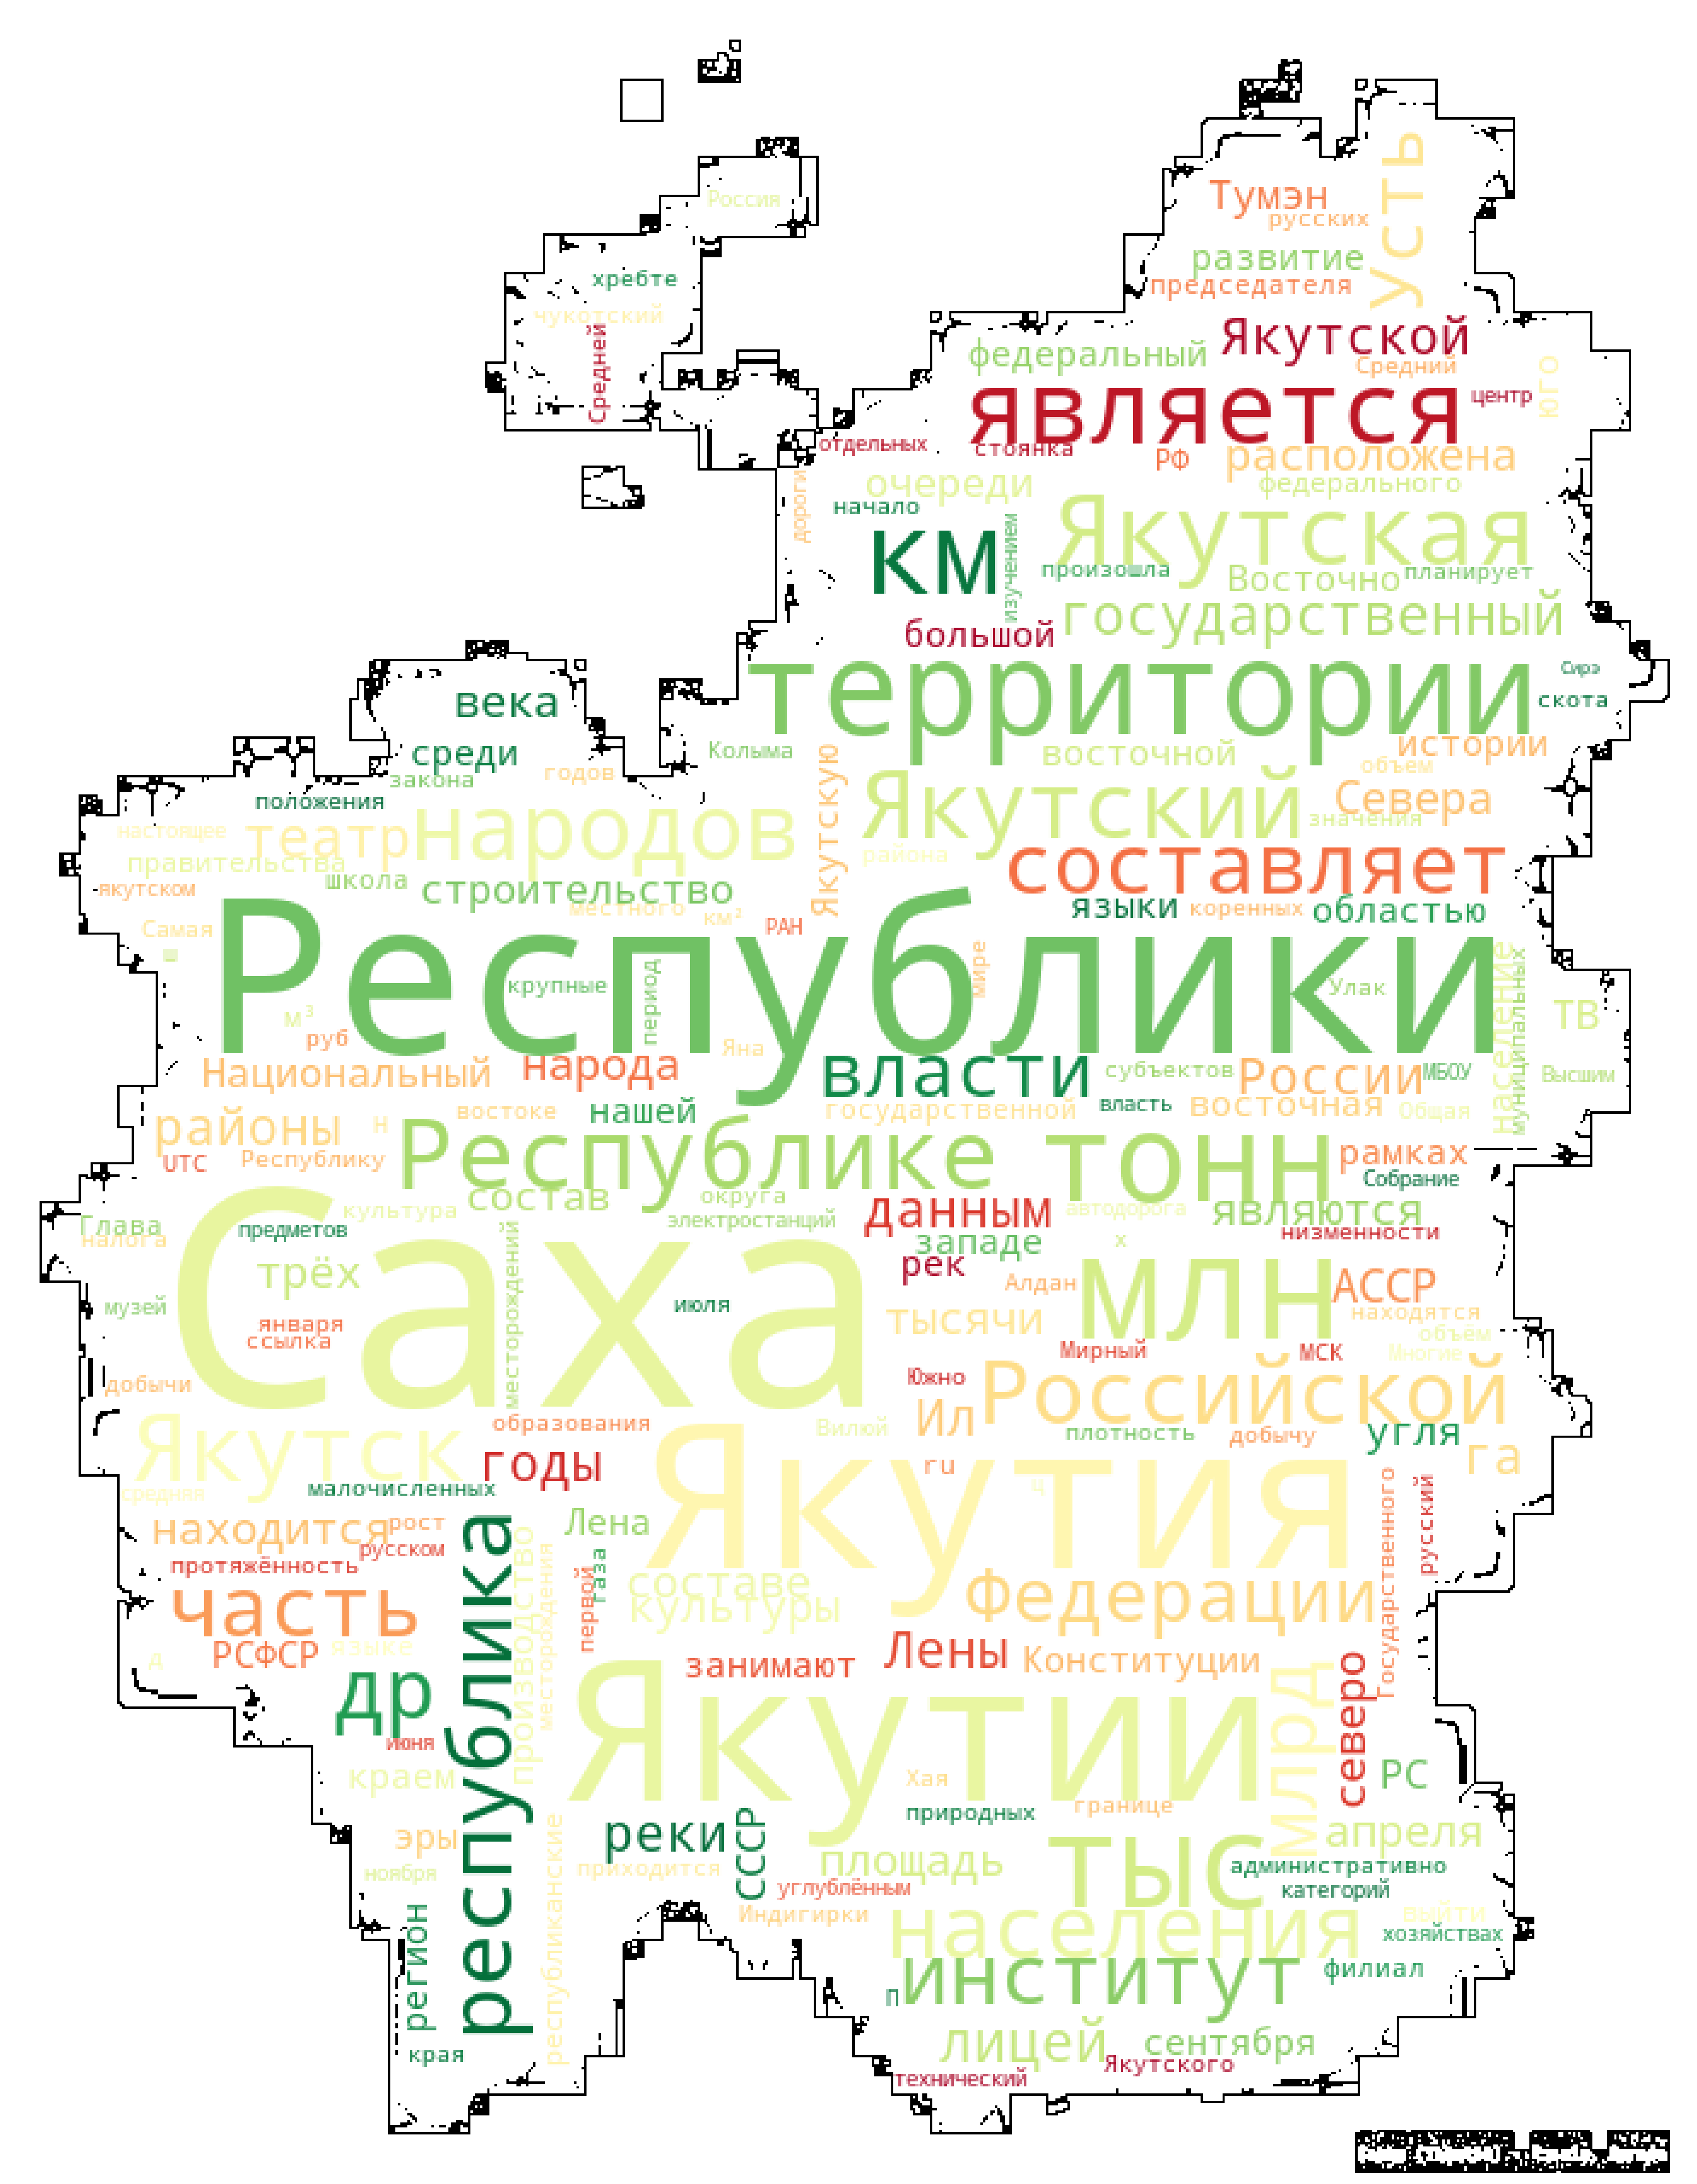

In [6]:
def generate_wordcloud(data, mask=None):
    cloud = WordCloud(
                      colormap='RdYlGn',
                      mask=shape,
                      background_color='white',
                      stopwords=stoplist,
                      collocations=False,
                      contour_color='black',
                      contour_width=1).generate_from_text(data)
    plt.figure(figsize=(100,80))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
         
generate_wordcloud(text, mask=shape)